In [1]:
import pandas as pd

# URL to the CSV file
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(url)


In [2]:
print(df.head())

print(df.info())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [4]:
#Clean the data

df = df.drop(columns=['iso_code', 'continent', 'tests_units'])

#Drop the rows with missing values in specific columns

df = df.dropna(subset=['total_cases', 'total_deaths'])

In [5]:
df['data'] = pd.to_datetime(df['date'])

#Calculate new daily cases and deaths
df['new_cases'] = df.groupby('location')['total_cases'].diff().fillna(0)
df['new_deaths'] = df.groupby('location')['total_deaths'].diff().fillna(0)

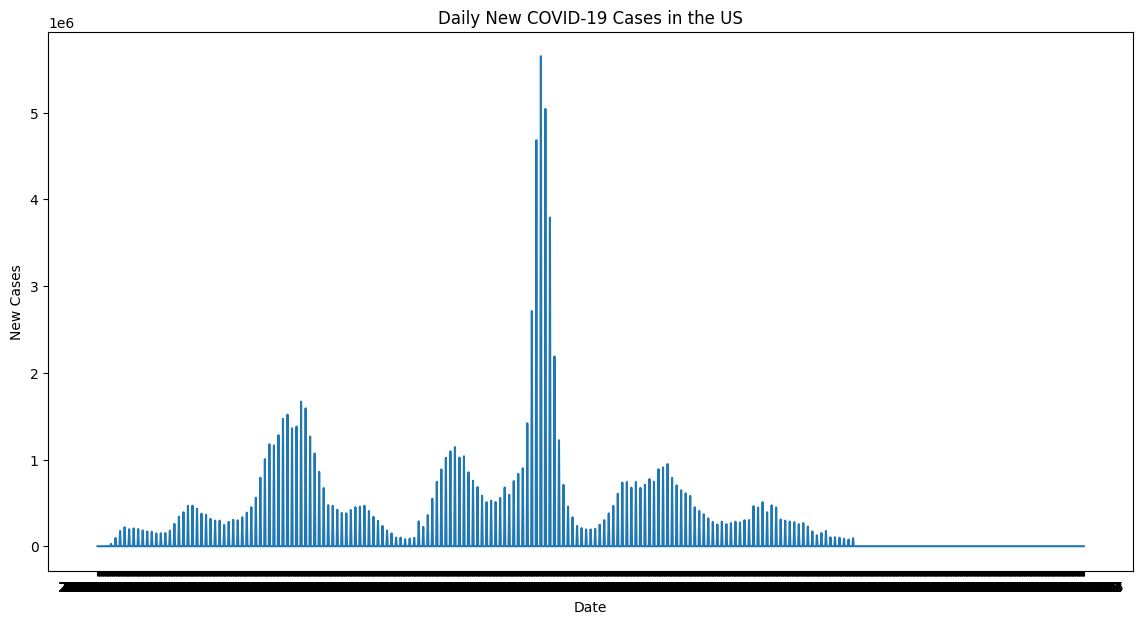

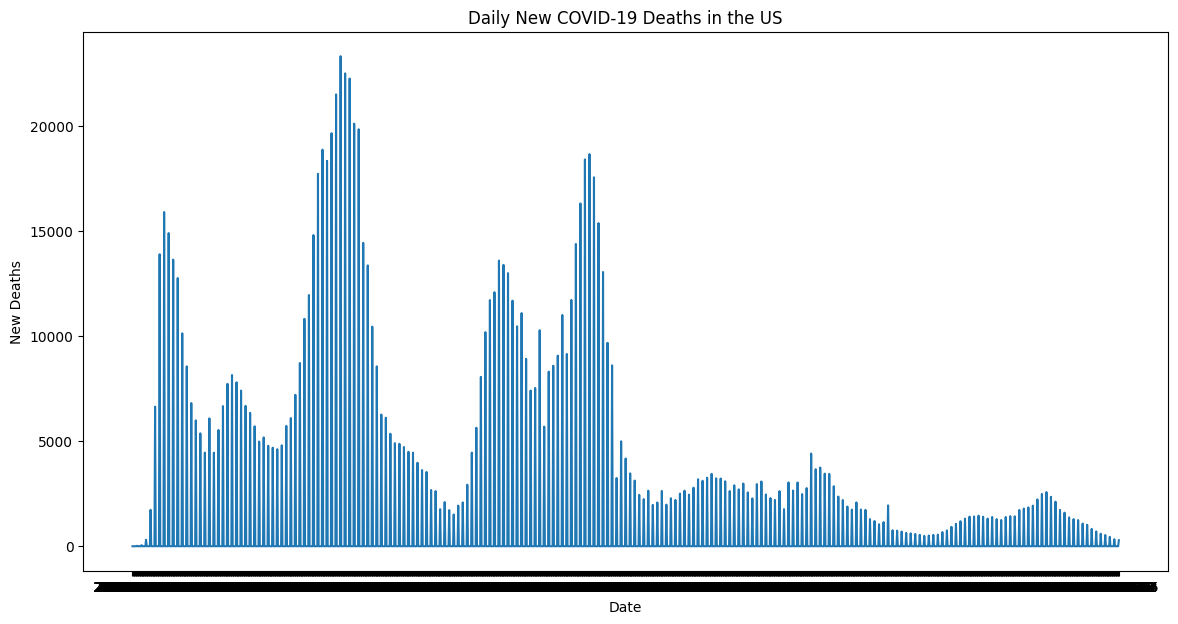

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#Filter data for a specific country

country_data = df[df['location'] == 'United States']

#Plot daily new cases

plt.figure(figsize=(14,7))
sns.lineplot(x='date', y='new_cases', data=country_data)
plt.title('Daily New COVID-19 Cases in the US')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.show()

# Plot daily new deaths
plt.figure(figsize=(14,7))
sns.lineplot(x='date', y='new_deaths', data=country_data)
plt.title('Daily New COVID-19 Deaths in the US')
plt.xlabel('Date')
plt.ylabel('New Deaths')
plt.show()